<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Expansiones basales
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción

* Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.
* Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.
* Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

## Ejercicio 1: Preparación del Ambiente de Trabajo

___
* Importe los módulos clásicos del trabajo en ciencia de datos.

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.
</div>

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings
# Se importa libreria para el menejo de expresiones regulares
import re

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Definimos algunos aspectos de ambiente y valores por defecto.
</div>

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (10, 6)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.
</div>

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Se utilizan librerías <strong>sklearn</strong> para el tratamiento de escala de valores de los atributos y seleccion de set de datos:
</div>

In [4]:
# Método para estandarizar datos
from sklearn.preprocessing import StandardScaler
# Método para la selección de datos entre entrenamiento y test
from sklearn.model_selection import train_test_split

___
* El archivo tiene el nombre `compresive_strength_concrete.csv`. Impórtelo y genere estadísticas descriptivas.
* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de lasmedidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería `pyGAM`.

In [5]:
df = pd.read_csv("compresive_strength_concrete.csv")
df.sample(1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
841,305.0,0.0,100.0,196.0,10.0,959.0,705.0,28,30.12


In [6]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
# Revisamos las dimensiones de la base de datos
df.shape

(1030, 9)

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
La base de datos se compone de 1030 observaciones con 9 atributos, dentro de los cuales se encuentra nuestra variable objetivo (Concrete compressive strength(MPa, megapascals)). 
</div>

## Ejercicio 2: Descripción
___
* El vector objetivo tiene el nombre de `Concrete compressive strength(MPa, megapascals)`.
* Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrarlas variables o acceder a éstas mediante notación de índice `iloc`

In [8]:
# Cambiamos el nombre de las columnas para simplificar la visualización.
# Usamos expresiones regulares
df.columns = [re.sub('\s{0,2}\(.*', '', x).lower().replace(' ', '_') for x in df.columns]

___
* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                           1030 non-null float64
blast_furnace_slag               1030 non-null float64
fly_ash                          1030 non-null float64
water                            1030 non-null float64
superplasticizer                 1030 non-null float64
coarse_aggregate                 1030 non-null float64
fine_aggregate                   1030 non-null float64
age                              1030 non-null int64
concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Mediante df.info() pudimos observar que todas las variables son numéricas continuas y que <strong>no</strong> presentan valores perdidos, por lo tanto podemos comenzar a pensar en aplicar nuestro modelo sin problemas de este tipo.<br><br>
De todas manera revisaremos visualmente que no tenemos datos perdidos.
</div>

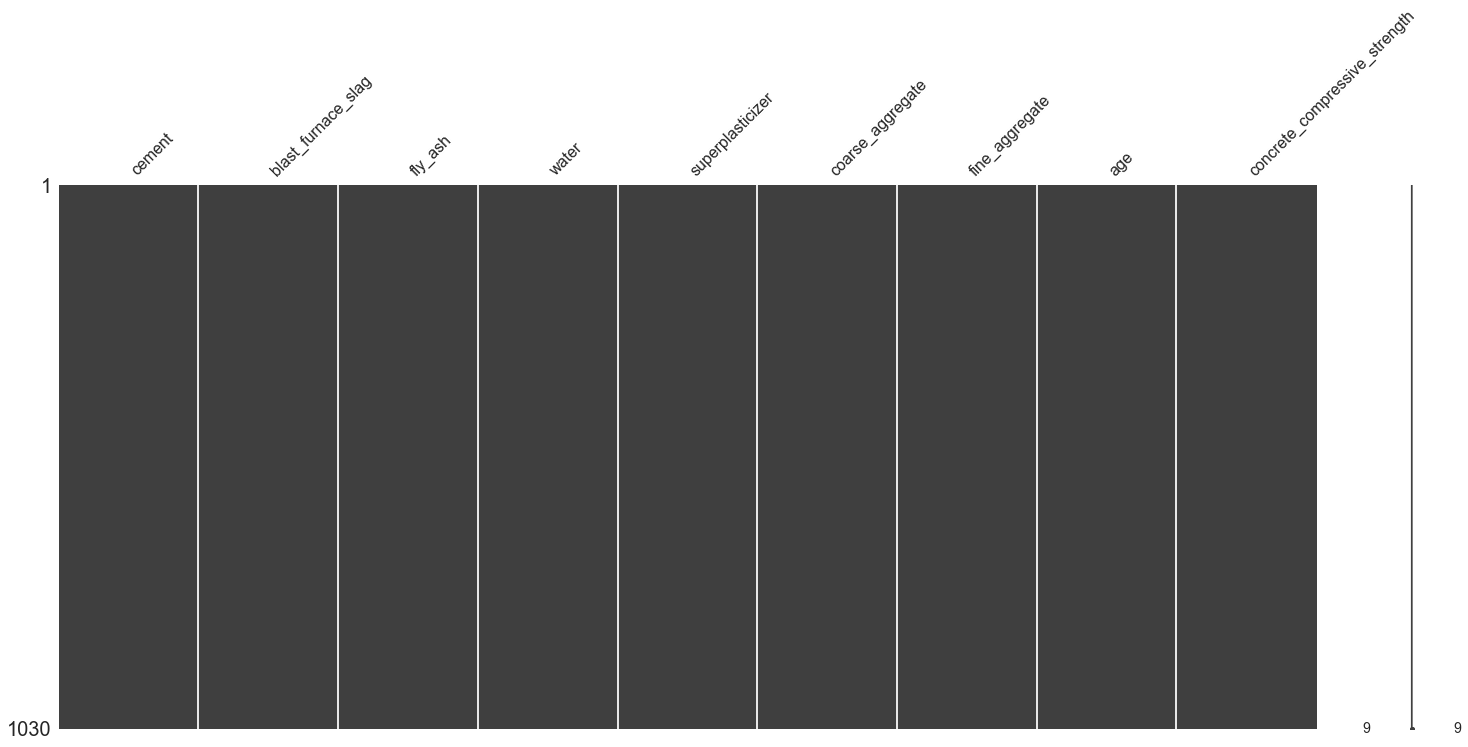

In [10]:
msngo.matrix(df)

#### Análisis Univariado:

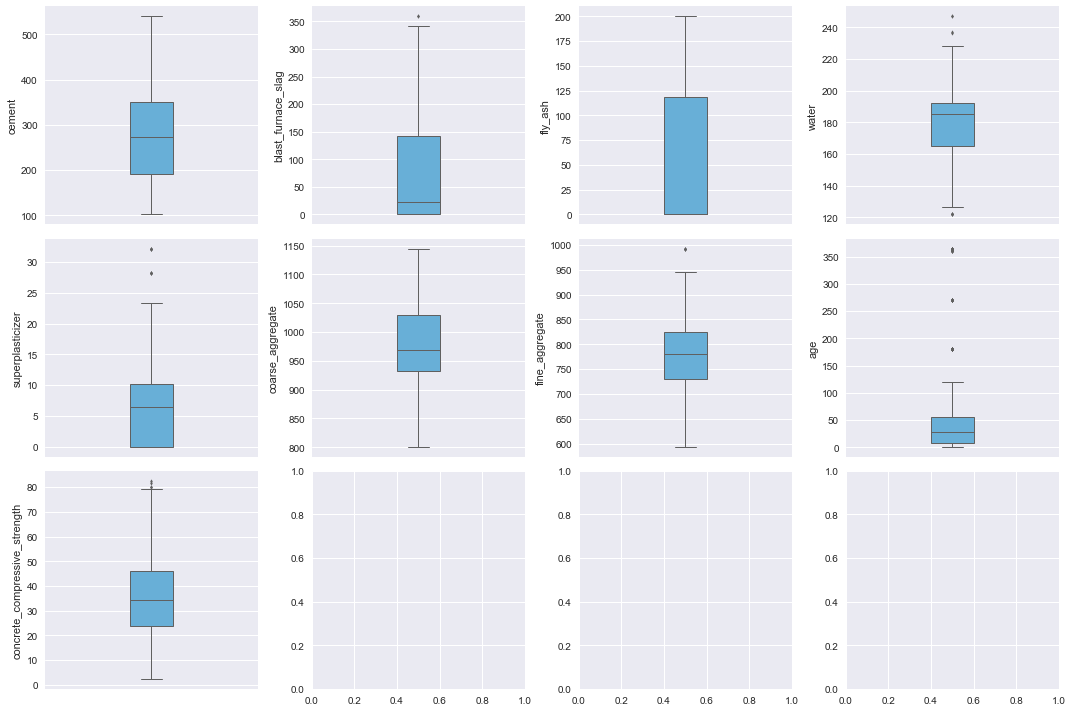

In [11]:
afx.display_boxplot(df, df.columns)

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Se observa que las escalas de valores de los atributos es irregular, por lo tanto en un siguiente paso vamos a re-escalar los valores con una media cero y varianza initaria.
</div>

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
    Se observa que algunos atributos presentan datos atípicos (outliers). Revisamos el porcentaje de datos atípicos por cada variable con nuestra función <strong>display_outliers</strong> disponible en <strong>ancilliary_funcs</strong> y se observa que los atributos <strong>[blast_furnace_slag]</strong>, <strong>[water]</strong>, <strong>[superplasticizer]</strong>, <strong>[fine_aggregate]</strong>, <strong>[age]</strong> y <strong>[concrete_compressive_strength]</strong> son los que presentan algun porcentaje de datos atípicos.<br><br>
</div>

In [12]:
afx.display_outliers(df)

,Variable,count,outliers,outliers %
0,cement,1030,0,0.00
1,blast_furnace_slag,1030,2,0.19
2,fly_ash,1030,0,0.00
3,water,1030,9,0.87
4,superplasticizer,1030,10,0.97
5,coarse_aggregate,1030,0,0.00
6,fine_aggregate,1030,5,0.49
7,age,1030,59,5.73
8,concrete_compressive_strength,1030,4,0.39


<div style='color: #854000; background-color: #ffe5e5;border-color: #ffdaff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Dado que no hemos abordado en el curso como tratar los datos atípicos, vamos a dejar nuestra base tal como está.
</div>

#### Análisis Bi-Variado:

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Revisamos la relación de nuestros atributos con nuestra variable objetivo (concrete_compressive_strength).
</div>

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Vamos a separar nuestro análisis en dos grupos para poder visualizar mejor los gráficos. Tomaremos los primeros 4 atributos y graficaremos mediante <strong>pairplot</strong> de <strong>seaborn</strong> un diagrama de dispersión para ver como se relacionan los atributos con nuestra variable <strong>quality</strong>.
</div>

<Figure size 1080x720 with 0 Axes>

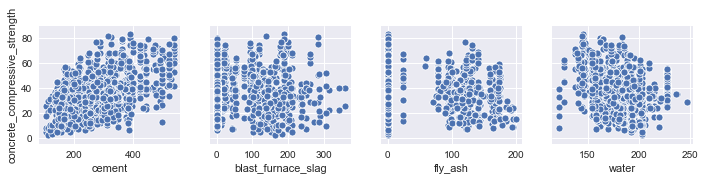

In [13]:
var_gx_1 = [x for i, x in enumerate(df.columns) if i <=3]
plt.figure(figsize=(15,10))
sns.pairplot(df, y_vars=['concrete_compressive_strength'], x_vars=var_gx_1)

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Ahora tomaremos los 4 atributos restantes y graficaremos mediante <strong>pairplot</strong> de <strong>seaborn</strong> un diagrama de dispersión.
</div>

<Figure size 1080x720 with 0 Axes>

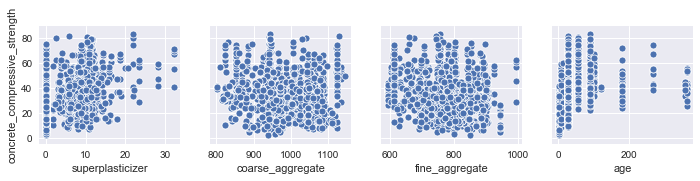

In [14]:
var_gx_2 = [x for i, x in enumerate(df.columns) if i >3 and i < len(df.columns)-1]
plt.figure(figsize=(15,10))
sns.pairplot(df, y_vars=['concrete_compressive_strength'], x_vars=var_gx_2)

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
    Visualmente podemos ver que todas las relaciones de atributos/concrete_compressive_strength presentan datos atípicos (outliers), que se escapan de la concentración de los datos.
</div>

<div style='color: #854000; background-color: #ffe5e5;border-color: #ffdaff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Dado que no hemos abordado en el curso como tratar los datos atípicos, vamos a dejar nuestra base tal como está.
</div>

## Ejercicio 3: Modelo

* En base al vector objetivo, decida el mejor modelo e impórtelo con pygam. Condicional a ésto,importe las métricas de desempeño asociadas.

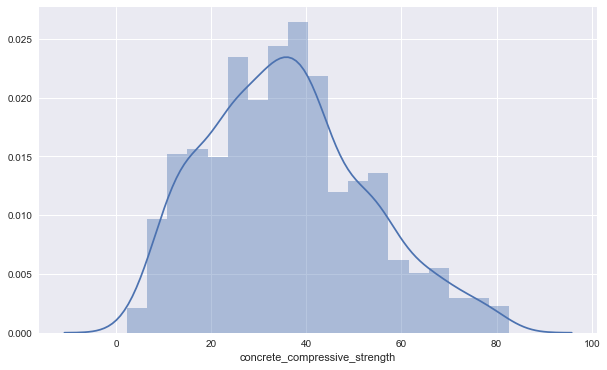

In [15]:
sns.distplot(df['concrete_compressive_strength'])

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Tenemos que nuestro vector objetivo (concrete_compressive_strength) es una variable continua con valores entre 0 y 80, centrados en 40.<br><br>
Para este tipo de variables podemos resolver un problema de regresión, por lo tanto usaremos <strong>LinearGAM</strong>, dentro de los modelos aditivos generalizados.
</div>

In [16]:
from pygam import LinearGAM

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Se utilizan los siguientes métodos para evaluar las métricas del modelo desde <strong>Machine Learning</strong>
</div>

In [17]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

* Genere conjuntos de entrenamiento y validación.

In [18]:
# Estandarizamos los atributos con media cero y desviación unitaria.
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [19]:
# Mantenemos nuestro vector objetivo tal cual viene en nuestra base
df_scaled['concrete_compressive_strength'] = df['concrete_compressive_strength']

In [20]:
# Generamos nuestra matriz de atributos (variables independientes)
X = df_scaled.drop(columns='concrete_compressive_strength')
# aislamos el vector objetivo
y = df_scaled['concrete_compressive_strength']

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Separamos nuestra base en datos para <strong>entrenamiento</strong> y <strong>validación</strong>, utilizaremos un 33% de la data para validar y el resto para el entrenamiento.
</div>

In [21]:
# Separamos nuestros datos en datos para generar el modelo y para testear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33,random_state = 14173)

* Genere un primer modelo __sin implementar la función gridsearch__. Repórte el hiperparámetro lam así como las métricas de desempeño asociadas.

In [22]:
gam = LinearGAM().fit(X_train , y_train)

/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [23]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     94.8209
Link Function:                     IdentityLink Log Likelihood:                                 -2820.5139
Number of Samples:                          690 AIC:                                             5832.6695
                                                AICc:                                              5863.95
                                                GCV:                                               30.8708
                                                Scale:                                             23.3427
                                                Pseudo R-Squared:                                   0.9295
Feature Function   Data Type      Num

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
La tabla de resultados nos indica que el modelo fue entrenado utilizando 25 splines, cada una de orden 3.
<br><br>    
A cada scpline se le asigno el mismo coeficiente de penalización $\lambda = 0.6$
<br><br>
El modelo obtuvo un pseudo R-squared de 0.9295, lo cual es bastante bueno ya que explica en un alto porcentange la varianza de la variable dependiente (concrete_compressive_strength)
</div>

___
<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Ahora vamos a evaluar el desempeño con nuestros datos de prueba.
</div>

In [24]:
yhat = gam.predict(X_test)
afx.report_scores_lineal(y_test, yhat)

Error Cuadrático Medio:
33.5788

Error Medio Absoluto:
3.8949

R cuadrado:
0.87


<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Podemos ver que el $R^2$ mantiene un valor alto con los nuevos datos entregados. Tenemos indicios de que estamos frente a un muy buen modelo.
</div>

* Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

In [25]:
search_params = {'lam': np.logspace(-3, 3, 100)}
gam_lam = LinearGAM().gridsearch(X_train, y_train, **search_params)

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
  1% (1 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:17/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
  2% (2 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:17/usr/local/lib/python3.7/site-packa

 19% (19 of 100) |####                   | Elapsed Time: 0:00:03 ETA:   0:00:14/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 20% (20 of 100) |####                   | Elapsed Time: 0:00:03 ETA:   0:00:14/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 21% (21 of 100) |####                   | Elapsed Time: 0:00:03 ETA:   0:00:13/usr/local/lib/python3.7/site-packa

 38% (38 of 100) |########               | Elapsed Time: 0:00:06 ETA:   0:00:11/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 39% (39 of 100) |########               | Elapsed Time: 0:00:07 ETA:   0:00:11/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 40% (40 of 100) |#########              | Elapsed Time: 0:00:07 ETA:   0:00:11/usr/local/lib/python3.7/site-packa

 56% (57 of 100) |#############          | Elapsed Time: 0:00:10 ETA:   0:00:07/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 57% (58 of 100) |#############          | Elapsed Time: 0:00:10 ETA:   0:00:07/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 59% (59 of 100) |#############          | Elapsed Time: 0:00:10 ETA:   0:00:07/usr/local/lib/python3.7/site-packa

 76% (76 of 100) |#################      | Elapsed Time: 0:00:13 ETA:   0:00:04/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 77% (77 of 100) |#################      | Elapsed Time: 0:00:14 ETA:   0:00:04/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 78% (78 of 100) |#################      | Elapsed Time: 0:00:14 ETA:   0:00:04/usr/local/lib/python3.7/site-packa

 95% (95 of 100) |#####################  | Elapsed Time: 0:00:18 ETA:   0:00:01/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 96% (96 of 100) |###################### | Elapsed Time: 0:00:19 ETA:   0:00:00/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 97% (97 of 100) |###################### | Elapsed Time: 0:00:19 ETA:   0:00:00/usr/local/lib/python3.7/site-packa

In [26]:
gam_lam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    106.2762
Link Function:                     IdentityLink Log Likelihood:                                 -2790.3803
Number of Samples:                          690 AIC:                                             5795.3129
                                                AICc:                                            5835.2476
                                                GCV:                                               30.7117
                                                Scale:                                             22.3349
                                                Pseudo R-Squared:                                   0.9339
Feature Function   Data Type      Num

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
La tabla de resultados nos indica que el modelo fue entrenado utilizando 25 splines, cada una de orden 3.
<br><br>    
A cada spline se le asigno el mismo coeficiente de penalización $\lambda = 0.2656$
<br><br>
El modelo obtuvo un pseudo R-squared de 0.9339, lo cual es mejor que el modelo anterior ($R^2$ gam = 0.9295), por lo tanto explica de mejor manera la varianza de la variable dependiente (concrete_compressive_strength).
</div>

___
<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Ahora vamos a evaluar el desempeño con nuestros datos de prueba.
</div>

In [27]:
yhat_lam = gam_lam.predict(X_test)
afx.report_scores_lineal(y_test, yhat_lam)

Error Cuadrático Medio:
33.8908

Error Medio Absoluto:
3.7304

R cuadrado:
0.87


<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Podemos ver que el $R^2$ mantiene un valor alto con los nuevos datos entregados. Tenemos indicios de que estamos frente a un muy buen modelo.
</div>

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Podemos ver que el $R^2$ de para los datos de prueba mantiene el valor respecto al modelo anterior ($R^2$ gam = $R^2$ gam_lam = 0.87)
</div>

## Ejercicio 4: Dependencia Parcial

* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
* Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
El mejor modelo encontrado en el punto anterior quedó registrado en <strong>[gam_lam]</strong>.<br>    

Vamos a generar un arreglo que contenga los valores de cada atributo, mediante generate_X_grid.
</div>

In [28]:
# Importamos el metodo para obtener los valores de cada atributo del modelo
from pygam.utils import generate_X_grid

/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


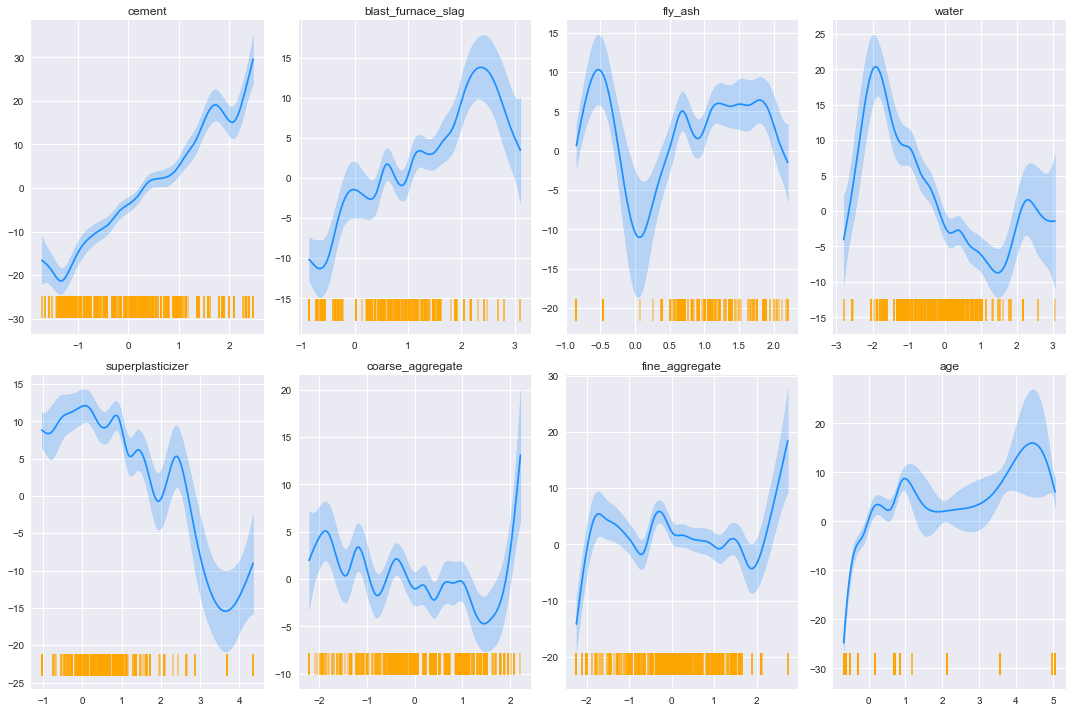

In [29]:
# Utilizamos la función generada en la librería de funciones auxiliares (ancilliary_funcs)
# para revisar visualmente rasgos de dependencias entre los atributos
afx.display_partial_dependence(gam_lam, X_train)

___
* Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de resistencia.

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
<strong>Cement</strong>: Tiene una tendencia lineal, a mayor cantidad mejora el nivel de resistencia.<br>
<strong>blast_furnace_slag</strong>: Tiene una forma NO lineal, una relación marcada con pendiente positiva hasta los 2.5, luego de ese valor, tiene un efecto negativo en la resistencia del concreto.<br>
<strong>fly_ash</strong>: Tiene una forma NO lineal, una varianza marcada con cambios de pendientes en los -0.5, 0 y 0, 65, luego se estabiliza de 1 a 2  y luego cae en la incidencia de la resistencia del concreto.<br>
<strong>water</strong>: Tiene una forma NO lineal, cambios pronunciados de pendientes, en valores bajos tiene una pendiente pronunciada afectando positivamente la resistencia del concreto, luego decae con la misma fuerza afectando negativamente y en el extremo superior se visualiza una mejoría.<br>
<strong>superplasticizer</strong>: Tiene una forma NO lineal, una varianza marcada con cambios de pendientes locales y una tendencia que afecta de forma negativa a la calidad del concreto.<br>
<strong>coarse_aggregate</strong>: Tiene una forma NO lineal, una varianza marcada con cambios de pendientes locales y una tendencia que afecta de forma negativa a la calidad del concreto, luego en valores superiores produce un efecto positivo en la calidad del concreto.<br>
<strong>fine_aggregate</strong>: Tiene una forma NO lineal, una varianza marcada con cambios pronunciados en los valores extremos, en valores inferiores afecta positivamente y en valores superiores se invierte esta relación.<br>
<strong>age</strong>: Tiene una forma NO lineal, una varianza menos marcada, con cambios pronunciados en los valores extremos, en valores inferiores afecta positivamente y en valores superiores se invierte esta relación. Este atributo está discretizado en días, por cuaanto se puede visualizar.<br>    
</div>

___

<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
A modo de visualizar el efecto de penalización de $\lambda$ vamos a generar un nuevo modelo con un valor alto ( $\lambda$=1000) y compararlo con el modelo generado anteriormente con GAM (gam_lam,  $\lambda$=0.2656)
</div>

In [30]:
gam_lam_aj = LinearGAM(lam=1e3).fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


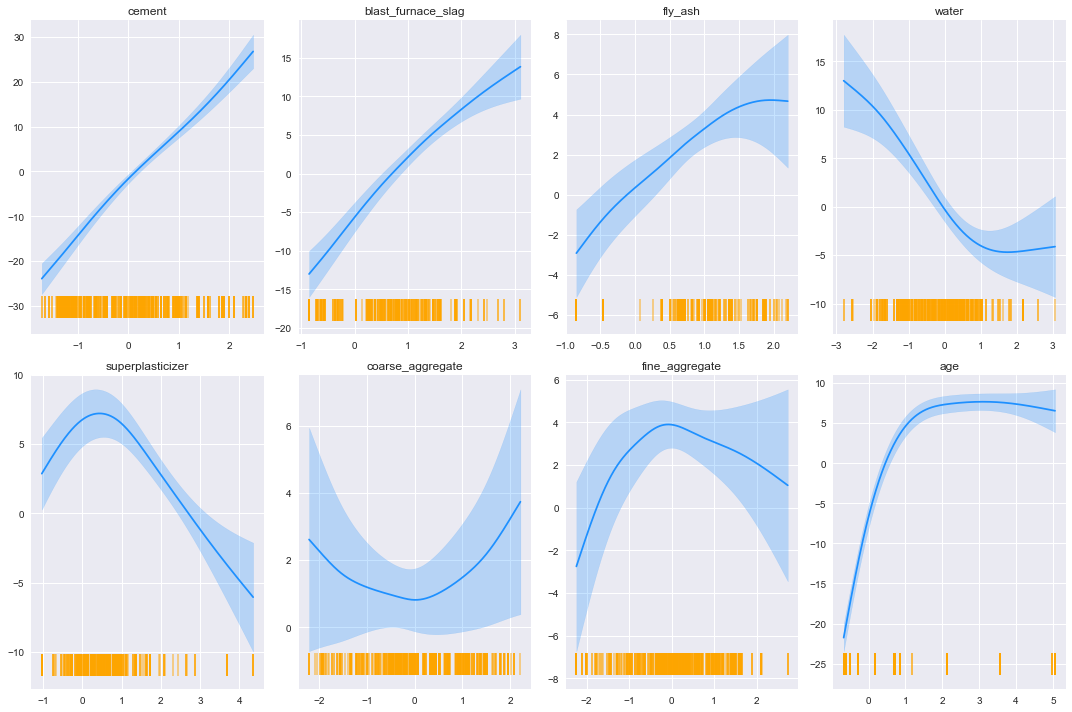

In [31]:
# Utilizamos la función generada en la librería de funciones auxiliares (ancilliary_funcs)
# para revisar visualmente rasgos de dependencias entre los atributos
afx.display_partial_dependence(gam_lam_aj, X_train)

In [32]:
gam_lam_aj.n_splines

25

In [33]:
gam_lam_aj.spline_order

3

In [34]:
afx.report_scores_lineal(y_test, gam_lam_aj.predict(X_test))

Error Cuadrático Medio:
55.4718

Error Medio Absoluto:
4.4799

R cuadrado:
0.79


<div style='color: #004085; background-color: #cce5ff;border-color: #b8daff;border-radius: .25rem;padding: .75rem 1.25rem;'>
Podemos observar que el nuevo modelo tiene las mismas 25 spline y de orden 3, no obstante al penalizar la concavidad en el efecto de las variables, se visualizan relaciones con menor varianza que el modelo anterior (gam_lam).<br><br>
No obstante observamos una aumento en las métricas de error y una disminución en la explicabilidad de la varianza de nuestro vector objetivo ($R^2$ y $R^2$ ajustado) 
</div>